In [1]:
# Se importa las librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
# Se carga los datos del .csv
df = pd.read_csv('C:/AnalisisDatos/RegresionLogis.csv')
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
#Se buscan valores nulos
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [5]:
#Se validan los datos y se reemplazan los valores nulos 
df['education'].fillna(df['education'].mean(), inplace=True)
df['cigsPerDay'].fillna(df['cigsPerDay'].mean(), inplace=True)
df['BPMeds'].fillna(df['BPMeds'].mean(), inplace=True)
df['totChol'].fillna(df['totChol'].mean(), inplace=True)
df['BMI'].fillna(df['BMI'].mean(), inplace=True)
df['heartRate'].fillna(df['heartRate'].mean(), inplace=True)
df['glucose'].fillna(df['glucose'].mean(), inplace=True)
#y luego se vuelve a verificar
df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [6]:
#Se valida si hay duplicados
df.duplicated().sum()

0

In [7]:
#Se procede a mostrar la estadistica
df.describe(include='all')

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.00000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.02963,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.007075,0.500024,11.879230,0.16852,0.076587,0.462763,0.158316,44.326453,22.038097,11.910850,4.070953,12.025177,22.836603,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.080000,68.000000,72.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.410000,75.000000,80.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.00000,0.000000,1.000000,0.000000,262.000000,144.000000,89.875000,28.037500,83.000000,85.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.00000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


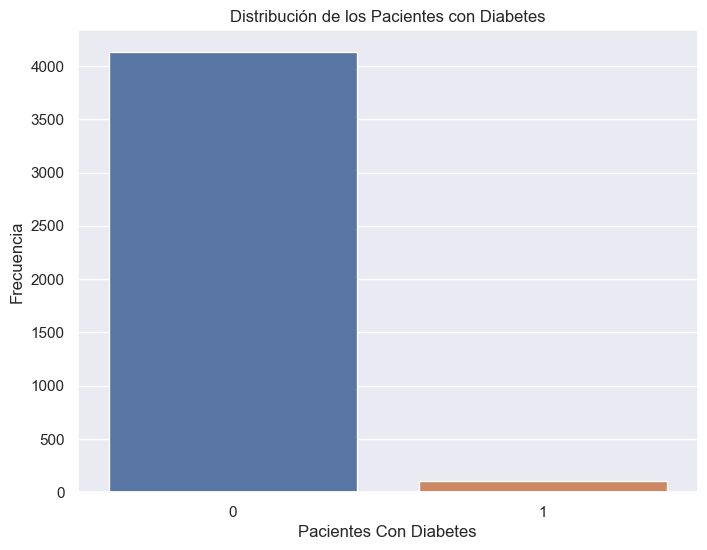

In [8]:
plt.figure(figsize=(8, 6))
sns.countplot(x=df["diabetes"])
plt.xlabel('Pacientes Con Diabetes')
plt.ylabel('Frecuencia')
plt.title('Distribución de los Pacientes con Diabetes')
plt.show()

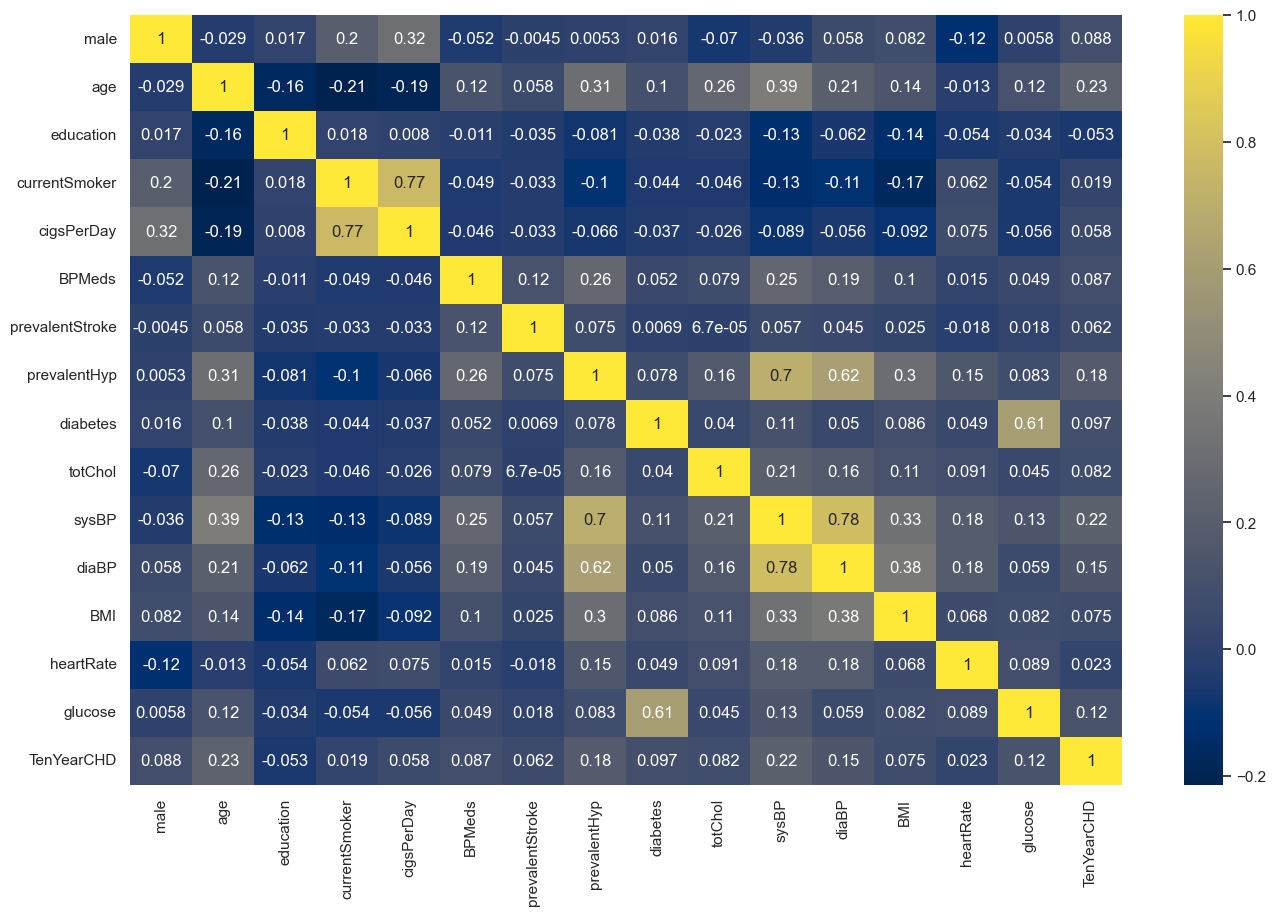

In [9]:
# Grafico de coorelacion
plt.figure(figsize=(16, 10))
corr = df.corr()
sns.heatmap(corr, cmap = 'cividis', annot= True);
plt.show()

In [10]:
#declara las características del vector
x = df.drop('diabetes', axis=1)
y = df['diabetes']

In [11]:
# Importar otra libreria
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x)
x_scaled = scaler.transform(x)

In [12]:
#realiza un Split a los datos
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2)

In [13]:
# modelo de regresion logistica
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

LogisticRegression()

In [14]:
# Se realiza la prediccíon
y_pred = log_reg.predict(x_train)

In [15]:
#Calculos
print("R-Cuadrado:", log_reg.score(x_train, y_train).round(3))

R-Cuadrado: 0.989


In [16]:
print("Coeficiente:", log_reg.coef_.round(3))

Coeficiente: [[ 0.153  0.34   0.089  0.032 -0.156  0.102 -0.166  0.303  0.066 -0.082
  -0.185  0.317  0.088  1.971  0.016]]


In [17]:
print("Intercepcion:", log_reg.intercept_.round(3))

Intercepcion: [-5.485]


In [18]:
log_reg_summary = pd.DataFrame(x.columns.values, columns=['Caracteristicas'])
log_reg_summary['Pesos'] = log_reg.coef_[0]
log_reg_summary

,Caracteristicas,Pesos
0,male,0.152627
1,age,0.340482
2,education,0.088866
3,currentSmoker,0.031965
4,cigsPerDay,-0.156353
5,BPMeds,0.102428
6,prevalentStroke,-0.166383
7,prevalentHyp,0.303308
8,totChol,0.065633
9,sysBP,-0.081840


In [19]:
# Se evalua el modelo
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_train, y_pred)
print(f'Precisión de la prediccion: {accuracy * 100:.2f}%')

Precisión de la prediccion: 98.94%


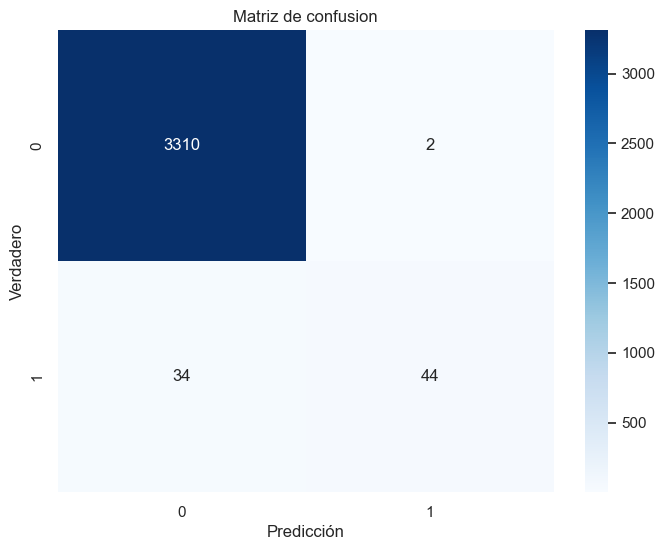

In [20]:
# Matriz de confusion
from sklearn.metrics import confusion_matrix

column_labels = list(y_train.unique())
cm = confusion_matrix(y_train, y_pred, labels=column_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=column_labels, yticklabels=column_labels)
plt.xlabel('Predicción')
plt.ylabel('Verdadero')
plt.title('Matriz de confusion')
plt.show()

In [21]:
from sklearn.metrics import classification_report

print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3312
           1       0.96      0.56      0.71        78

    accuracy                           0.99      3390
   macro avg       0.97      0.78      0.85      3390
weighted avg       0.99      0.99      0.99      3390



In [22]:
#Realiza la prediccón
y_test_pred = log_reg.predict(x_test)

In [23]:
# Evalua el modelo
from sklearn.metrics import accuracy_score
accuracy2 = accuracy_score(y_test, y_test_pred)
print(f'Validation Accuracy: {accuracy2 * 100:.2f}%')

Validation Accuracy: 97.76%


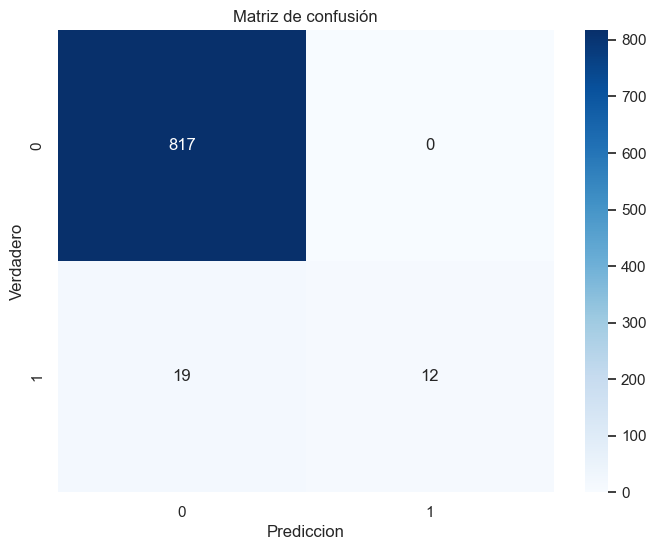

In [24]:
# Matriz de confusión
from sklearn.metrics import confusion_matrix

column_labels = list(y_test.unique())
cm = confusion_matrix(y_test, y_test_pred, labels=column_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=column_labels, yticklabels=column_labels)
plt.xlabel('Prediccion')
plt.ylabel('Verdadero')
plt.title('Matriz de confusión')
plt.show()

In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       817
           1       1.00      0.39      0.56        31

    accuracy                           0.98       848
   macro avg       0.99      0.69      0.77       848
weighted avg       0.98      0.98      0.97       848

